# `Decision Tree`

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
round(np.sqrt(len(cancer.feature_names)))

5.0

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

dclf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

print('Train accuracy: %f' % (dclf.score(X_train, y_train)))
print('Test accuracy : %f' % dclf.score(X_test, y_test))


Train accuracy: 0.988263
Test accuracy : 0.951049


In [3]:
import matplotlib.pyplot as plt
import numpy as np

feature = sorted(list(zip(dclf.feature_importances_ , cancer.feature_names)), reverse=True)
feature

[(0.7268285094603201, 'worst radius'),
 (0.12211319926548449, 'worst concave points'),
 (0.0483982536186494, 'texture error'),
 (0.045815897088866304, 'worst texture'),
 (0.0181879968644502, 'worst concavity'),
 (0.014157702104714051, 'worst smoothness'),
 (0.01188547831013032, 'worst symmetry'),
 (0.010197368202069328, 'radius error'),
 (0.002415595085315826, 'smoothness error'),
 (0.0, 'worst perimeter'),
 (0.0, 'worst fractal dimension'),
 (0.0, 'worst compactness'),
 (0.0, 'worst area'),
 (0.0, 'symmetry error'),
 (0.0, 'perimeter error'),
 (0.0, 'mean texture'),
 (0.0, 'mean symmetry'),
 (0.0, 'mean smoothness'),
 (0.0, 'mean radius'),
 (0.0, 'mean perimeter'),
 (0.0, 'mean fractal dimension'),
 (0.0, 'mean concavity'),
 (0.0, 'mean concave points'),
 (0.0, 'mean compactness'),
 (0.0, 'mean area'),
 (0.0, 'fractal dimension error'),
 (0.0, 'concavity error'),
 (0.0, 'concave points error'),
 (0.0, 'compactness error'),
 (0.0, 'area error')]

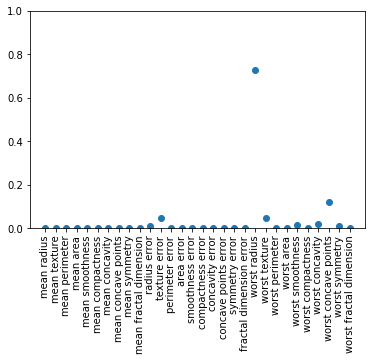

In [4]:
plt.plot(dclf.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1);

# `Esemble of Decision Tree`

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print('Train accuracy: %f' % forest.score(X_train, y_train))
print('Test accuracy : %f' % forest.score(X_test, y_test))


Train accuracy: 0.960000
Test accuracy : 0.920000


In [28]:
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1, max_features=5)
forest.fit(X_train, y_train)

print('Train accuracy: %f' % (forest.score(X_train, y_train)))
print('Test accuracy : %f' % forest.score(X_test, y_test))

Train accuracy: 1.000000
Test accuracy : 0.951049


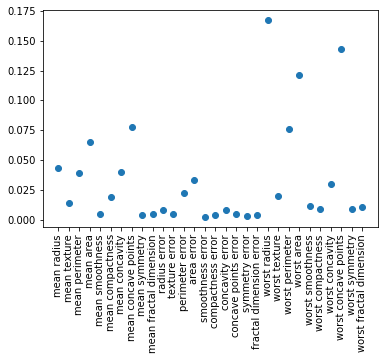

In [18]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

# `Gradient Boosted Regression Trees (Gradient Boosting Machines)`

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
gbrt.fit(X_train, y_train)

print('Train accuracy: %f' % (gbrt.score(X_train, y_train)))
print('Test accuracy : %f' % gbrt.score(X_test, y_test))

Train accuracy: 0.990610
Test accuracy : 0.972028


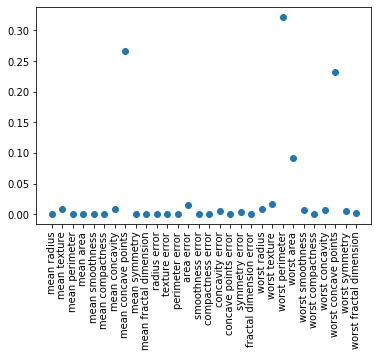

In [45]:
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);